In [1]:
import matplotlib.pyplot as plt
import pandas as pd

#results = pd.read_csv(f"optimization_results/optimization_result_unfavourable0_2025-06-06_03-12.csv")

#New
#results = pd.read_csv(f"optimization_results/optimization_result_unfavourable0_2025-06-08_04-22.csv")
#results = pd.read_csv(f"optimization_results/optimization_result_favourable0_2025-06-08_01-15.csv")
#results = pd.read_csv(f"optimization_results/optimization_result_nfe100000_medium0_2025-06-06_16-34.csv")



In [2]:
# Weet niet of dit correct is qua totale kosten


In [3]:
setting = 0
if setting == 1:
    results = pd.read_csv(f"optimization_results/picked_optimization_result_unfavourable2_2025-06-08_07-29.csv")
    results['total costs'] = results['Expected Annual Damage'] + results['Dike Investment Costs'] + results['RfR Investment Costs'] + results['Evacuation Costs']
    threshold_evacuation = results['Evacuation Costs'].quantile(0.6)
    threshold_rfr = 10e7
    threshold_total_costs = results['total costs'].quantile(0.6)
    threshold_dike_costs = results['Dike Investment Costs'].quantile(0.6)
    threshold_deaths = 0.0267
    threshold_damage = results['Expected Annual Damage'].quantile(0.6)   
elif setting == 2:
    results = pd.read_csv(f"optimization_results/picked_optimization_result_favourable0_2025-06-08_01-15.csv")
    results['total costs'] = results['Expected Annual Damage'] + results['Dike Investment Costs'] + results['RfR Investment Costs'] + results['Evacuation Costs']
    threshold_evacuation = results['Evacuation Costs'].quantile(0.6)
    threshold_rfr = 10e7
    threshold_total_costs = results['total costs'].quantile(0.55)
    threshold_dike_costs = results['Dike Investment Costs'].quantile(0.6)
    threshold_deaths = 0.02
    threshold_damage = results['Expected Annual Damage'].quantile(0.6)
else:
    results = pd.read_csv(f"optimization_results/picked2_optimization_result_nfe100000_medium0_2025-06-06_16-34.csv")
    results['total costs'] = results['Expected Annual Damage'] + results['Dike Investment Costs'] + results['RfR Investment Costs'] + results['Evacuation Costs']
    threshold_evacuation = results['Evacuation Costs'].quantile(0.66)
    threshold_rfr = 10e7
    threshold_total_costs = results['total costs'].quantile(0.64)
    threshold_dike_costs = results['Dike Investment Costs'].quantile(0.7)
    threshold_deaths = 0.024
    threshold_damage = results['Expected Annual Damage'].quantile(0.5)





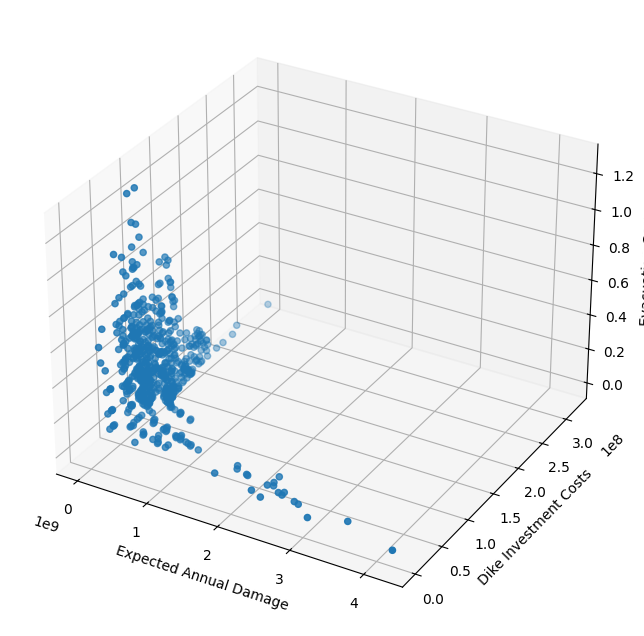

In [4]:
from mpl_toolkits.mplot3d import Axes3D  

metrics = results.iloc[:,-6:]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(metrics['Expected Annual Damage'], metrics['Dike Investment Costs'], metrics['RfR Investment Costs'])
ax.set_xlabel('Expected Annual Damage')
ax.set_ylabel('Dike Investment Costs')
ax.set_zlabel('Evacuation Costs')
plt.show()

In [5]:
from ema_workbench.analysis import parcoords

limits = parcoords.get_limits(metrics)
#axes = parcoords.ParallelAxes(limits)
#axes.plot(metrics)

# we invert this axis so direction of desirability is the same 

#plt.show()


In [6]:
metrics.describe()

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total costs
count,6.440000e+02,6.440000e+02,6.440000e+02,644.000000,644.000000,6.440000e+02
mean,1.945739e+08,9.696865e+07,2.551769e+08,1729.631553,0.198106,5.467211e+08
std,4.413011e+08,4.621819e+07,2.199543e+08,2797.092506,0.584118,4.078525e+08
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.970502e+08
25%,3.461982e+07,6.814199e+07,8.460000e+07,0.000000,0.009893,3.400832e+08
50%,8.256920e+07,9.094354e+07,1.999000e+08,3.330923,0.032723,4.475544e+08
75%,1.477650e+08,1.246648e+08,3.825000e+08,2686.128667,0.119639,6.159840e+08
max,4.209772e+09,3.205695e+08,1.270300e+09,15660.718373,5.431176,4.209772e+09


In [7]:
results.head()

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total costs
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2.065469e+09,2.029929e+07,84600000.0,0.0,3.510851,2.170368e+09
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.765889e+09,2.216782e+07,0.0,0.0,2.485362,2.788057e+09
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,9.665501e+08,5.689293e+07,0.0,0.0,1.008810,1.023443e+09
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.209772e+09,0.000000e+00,0.0,0.0,5.431176,4.209772e+09
4,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,8.504857e+08,3.269490e+07,61400000.0,0.0,1.101663,9.445806e+08


In [8]:
# Select rows where all values in the specified columns are 0
columns_RfR = ['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2']
results = results[results[columns_RfR].eq(0).all(axis=1)]

# Display the filtered DataFrame
#results

In [9]:
# Only policies with a rfr cost above 0

results = results[results['RfR Investment Costs'] > threshold_rfr]
print(f"Number of policies after filtering: {len(results)}")

results

Number of policies after filtering: 11


,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total costs
82,0,0,0,0,0,0,0,1,0,1,...,0,4,0,0,2.791686e+06,1.916590e+08,151900000.0,229.264883,0.000238,3.463510e+08
168,0,0,0,0,0,0,1,1,0,0,...,0,4,0,0,1.092565e+06,1.920441e+08,182600000.0,61.315163,0.000299,3.757367e+08
272,0,0,0,0,0,0,1,1,0,1,...,0,3,0,0,9.320139e+06,1.751132e+08,182600000.0,0.000000,0.011358,3.670333e+08
282,0,0,0,0,0,0,0,0,1,0,...,0,4,0,0,4.503857e+06,1.901969e+08,151900000.0,0.000000,0.005617,3.466008e+08
313,0,0,0,0,0,0,1,0,0,0,...,0,4,0,0,1.112913e+06,1.946445e+08,151900000.0,49.504544,0.000386,3.476575e+08
350,0,0,0,0,0,0,0,1,0,0,...,0,3,0,0,1.953506e+07,1.707840e+08,151900000.0,698.644558,0.007488,3.422198e+08
402,0,0,0,0,0,0,1,1,0,1,...,0,0,0,0,7.892641e+07,1.165376e+08,182600000.0,0.000000,0.072623,3.780640e+08
409,0,0,0,0,0,0,0,0,0,0,...,0,3,0,0,2.000052e+07,1.792305e+08,121200000.0,768.295055,0.006697,3.204318e+08
497,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,1.096529e+07,1.843887e+08,121200000.0,897.458938,0.001547,3.165549e+08
531,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,3.513965e+07,1.198481e+08,334500000.0,1450.357881,0.010301,4.894892e+08


In [10]:
results = results[results['total costs'] <= threshold_total_costs]
print(f"Number of policies after filtering: {len(results)}")

#results = results[results['total costs'] < 0.25e9] 

Number of policies after filtering: 11


In [11]:
results = results[results['Dike Investment Costs'] <= threshold_dike_costs] 
print(f"Number of policies after filtering: {len(results)}")

Number of policies after filtering: 1


In [ ]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

results
# Save the filtered results to a new CSV file
# results.to_csv(f"optimization_results/filtered_picked2_optimization_result_nfe100000_medium0_2025-06-06_16-34.csv", index=False)


In [209]:
results = results[results['Expected Number of Deaths'] <= threshold_deaths]
print(f"Number of policies after filtering: {len(results)}") 

Number of policies after filtering: 0


In [210]:
results = results[results['Expected Annual Damage'] <= threshold_damage] 
print(f"Number of policies after filtering: {len(results)}")

Number of policies after filtering: 0


In [211]:
results = results[results['Evacuation Costs'] <= threshold_evacuation] 
print(f"Number of policies after filtering: {len(results)}")

Number of policies after filtering: 0


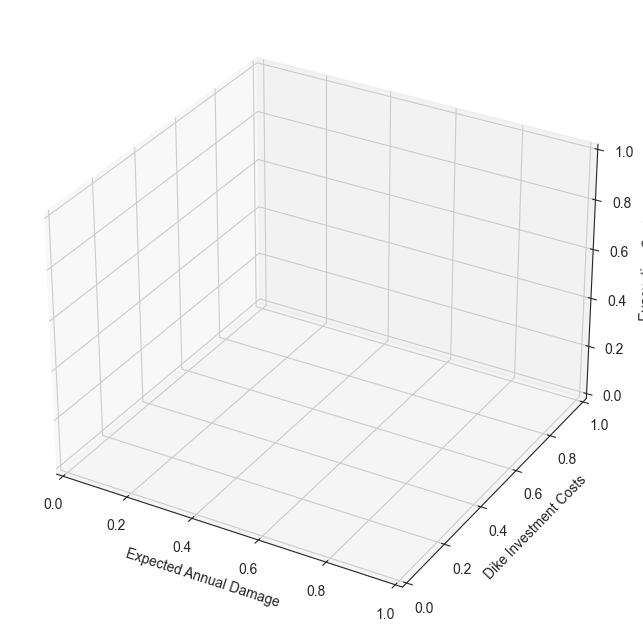

In [212]:
from mpl_toolkits.mplot3d import Axes3D  

metrics = results.iloc[:,-6:]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(metrics['Expected Annual Damage'], metrics['Dike Investment Costs'], metrics['RfR Investment Costs'])
ax.set_xlabel('Expected Annual Damage')
ax.set_ylabel('Dike Investment Costs')
ax.set_zlabel('Evacuation Costs')
plt.show()

In [213]:
from ema_workbench.analysis import parcoords

limits = parcoords.get_limits(metrics)
axes = parcoords.ParallelAxes(limits)
axes.plot(metrics)

# we invert this axis so direction of desirability is the same 

plt.show()


ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
results.head()

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total costs
48,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,4,0,0,0,0,0,2.456450e+07,4.391676e+07,182600000.0,0.0,0.026032,2.510813e+08
69,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6,0,0,3,0,0,0,0,0,2.641578e+07,3.985221e+07,213300000.0,0.0,0.026647,2.795680e+08
81,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,4,0,0,0,0,0,2.424281e+07,4.109399e+07,213300000.0,0.0,0.025359,2.786368e+08
96,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,4,0,0,0,0,0,2.411413e+07,4.391676e+07,334500000.0,0.0,0.025090,4.025309e+08


In [ ]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
results

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,total costs
48,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,4,0,0,0,0,0,2.456450e+07,4.391676e+07,182600000.0,0.0,0.026032,2.510813e+08
69,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6,0,0,3,0,0,0,0,0,2.641578e+07,3.985221e+07,213300000.0,0.0,0.026647,2.795680e+08
81,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,4,0,0,0,0,0,2.424281e+07,4.109399e+07,213300000.0,0.0,0.025359,2.786368e+08
96,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,4,0,0,0,0,0,2.411413e+07,4.391676e+07,334500000.0,0.0,0.025090,4.025309e+08


In [ ]:
policy = results.iloc[:,:-6]

In [ ]:
Save = 0
if Save ==1:
    if setting ==1:
        policy.to_csv("policies/unfavourable_policy.csv", index=False)
    elif setting == 2:
        policy.to_csv("policies/favourable_policy.csv", index=False)
    else:
        policy.to_csv("policies/medium_policy.csv", index=False)

In [ ]:
policy

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,3_RfR 1,3_RfR 2,4_RfR 0,4_RfR 1,4_RfR 2,EWS_DaysToThreat,A.1_DikeIncrease 0,A.1_DikeIncrease 1,A.1_DikeIncrease 2,A.2_DikeIncrease 0,A.2_DikeIncrease 1,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
48,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,4,0,0,0,0,0
69,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6,0,0,3,0,0,0,0,0
81,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,4,0,0,0,0,0
96,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,4,0,0,0,0,0


In [ ]:
for i in results.columns:
    print(i,'mean:',results[i].mean())
    #print(i,results[i].mean(),round(results[i].mean()))

0_RfR 0 mean: 0.0
0_RfR 1 mean: 0.0
0_RfR 2 mean: 0.0
1_RfR 0 mean: 0.0
1_RfR 1 mean: 0.0
1_RfR 2 mean: 0.0
2_RfR 0 mean: 1.0
2_RfR 1 mean: 1.0
2_RfR 2 mean: 0.75
3_RfR 0 mean: 0.25
3_RfR 1 mean: 0.75
3_RfR 2 mean: 0.25
4_RfR 0 mean: 0.0
4_RfR 1 mean: 0.0
4_RfR 2 mean: 0.0
EWS_DaysToThreat mean: 0.0
A.1_DikeIncrease 0 mean: 0.0
A.1_DikeIncrease 1 mean: 0.0
A.1_DikeIncrease 2 mean: 0.0
A.2_DikeIncrease 0 mean: 0.0
A.2_DikeIncrease 1 mean: 0.0
A.2_DikeIncrease 2 mean: 0.0
A.3_DikeIncrease 0 mean: 6.5
A.3_DikeIncrease 1 mean: 0.0
A.3_DikeIncrease 2 mean: 0.0
A.4_DikeIncrease 0 mean: 3.75
A.4_DikeIncrease 1 mean: 0.0
A.4_DikeIncrease 2 mean: 0.0
A.5_DikeIncrease 0 mean: 0.0
A.5_DikeIncrease 1 mean: 0.0
A.5_DikeIncrease 2 mean: 0.0
Expected Annual Damage mean: 24834305.635488905
Dike Investment Costs mean: 42194928.17429288
RfR Investment Costs mean: 235925000.0
Evacuation Costs mean: 0.0
Expected Number of Deaths mean: 0.0257819398382691
total costs mean: 302954233.8097818
